In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [3]:
# 대출정보.txt
rent_df = pd.read_csv('../Data/대출정보.txt', sep=',', encoding='EUC-KR')
rent_df[:3]

,도서ID,대출일시
0,SS_213406,2004-11-15 12:33:01
1,SS_213528,2004-12-04 12:20:33
2,SS_213528,2004-11-18 18:05:08


In [4]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916709 entries, 0 to 916708
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   도서ID    916709 non-null  object
 1   대출일시    916709 non-null  object
dtypes: object(2)
memory usage: 14.0+ MB


In [5]:
rent_df.isnull().sum() / len(rent_df)

도서ID    0.0
대출일시    0.0
dtype: float64

In [6]:
# 각 열에서 가장 긴 데이터 길이 계산
max_lengths = rent_df.astype(str).applymap(len).max()

# 결과 출력
print(max_lengths)

/tmp/ipykernel_14839/1290547690.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_lengths = rent_df.astype(str).applymap(len).max()


도서ID     9
대출일시    19
dtype: int64


In [7]:
# '대출일시'에서 월 추출
rent_df['대출월'] = pd.to_datetime(rent_df['대출일시']).dt.month

In [8]:
# 월별 데이터 카운트
month_counts = rent_df['대출월'].value_counts().sort_index()

In [9]:
month_counts

대출월
1      52315
2      38463
3     102988
4      89882
5      98078
6      82872
7      52480
8      45394
9      97414
10     85139
11     97207
12     74477
Name: count, dtype: int64

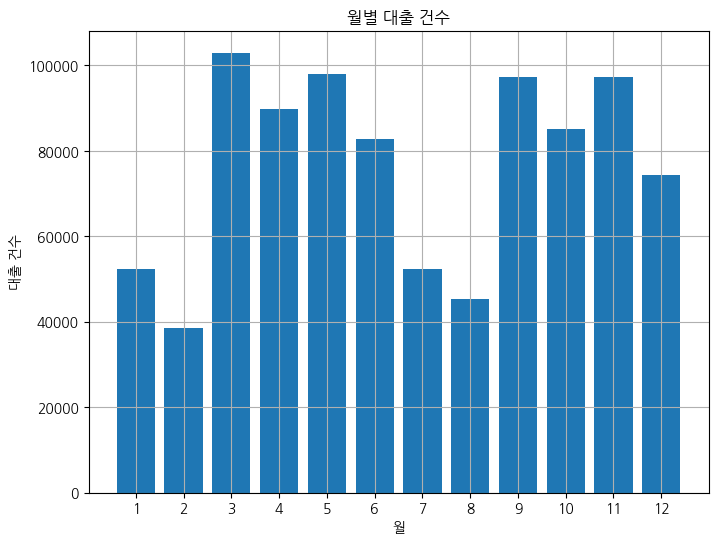

In [10]:
# 한글 폰트 설정
mpl.rc('font', family='NanumGothic')  # 나눔고딕 폰트 예시

plt.figure(figsize=(8, 6))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('월')
plt.ylabel('대출 건수')
plt.title('월별 대출 건수')
plt.xticks(month_counts.index)  # 월 값 표시
plt.grid(True)
plt.show()